# Anonymized data about subscribers' Analysis


### Content
+ 1.Introduction
+ 2.Data description
+ 3.Data preparation
+ 3.EDA
+ 5.Models Creation
+ 6.Models Comparison
+ 7.Conclusion

## 1. Introduction

+ The purpose is to describe the stages of building a model, build a model, evaluate it and tell the business how to apply it, that is, you need a business interpretation.

+ Anonymized data about subscribers: the language of the subscriber's service, the tariff plan, information about the volume of consumption of various services of the operator, and others.

+ The objective is to make an exploratory data analysis by making graphs in order to understand and find out more clearly the dataset. Furthermore, we have made a data preparation by dropping unneded column, and preprocessing by using MinMaxScaller  library.
+ Finally, created the suitable models by using NauveBayes, RandomForest , KNN classifiers and also SVM and PCA models to hanle with anomaly detection along with unbalanced dataset.

##  Data description:
    + C1,C2,C3 - is for categorical attributes 
    + N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,..,N23 - is for Numerical attributes 
    + TARGET - is for our target variable 

## *Importing 'must-have' Libraries like these:*

In [ ]:
import numpy as np  # to access data in any formats.
import pandas as pd  # to work with data frame formats.

# visual
import matplotlib.pyplot as plt
import seaborn as sns

# missing data
import missingno as msno

# to split dataset to train and test
from sklearn.model_selection import train_test_split

# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# ML
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM

# ML classifier model Evaluation
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score ,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 3. Data preparation

In [ ]:
data = pd.read_csv('train.csv', sep=';')

data.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,"83,74","3172,92","181,48","24,83","9,6",0,0,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,"1,46","1273,88","92,11","211,78","28,98","5,75","13,85",...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0,"31,95","763,19","48,13","77,22","9,33","4,9",...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,"117,49","529,19","1506,4","127,67","49,3","6,25","0,2",...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0,"38,24","3493,18","389,98","72,78","16,72","4,28",...,28,17,5,69,23,86,28,0,0,0


In [ ]:
data.shape

(514009, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C1      514009 non-null  int64 
 1   C2      514009 non-null  int64 
 2   C3      514009 non-null  int64 
 3   N1      514009 non-null  object
 4   N2      514009 non-null  object
 5   N3      514009 non-null  object
 6   N4      514009 non-null  object
 7   N5      514009 non-null  object
 8   N6      514009 non-null  object
 9   N7      514009 non-null  object
 10  N8      514009 non-null  object
 11  N9      514009 non-null  object
 12  N10     514009 non-null  object
 13  N11     514009 non-null  object
 14  N12     514009 non-null  object
 15  N13     514009 non-null  object
 16  N14     514009 non-null  int64 
 17  N15     514009 non-null  int64 
 18  N16     514009 non-null  int64 
 19  N17     514009 non-null  int64 
 20  N18     514009 non-null  int64 
 21  N19     514009 non-null  int64 
 

In [ ]:
data.describe()

,C1,C2,C3,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,5.140090e+05,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411,49.656251,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,8.589417e+14,51107.511245,0.929149,58.781180,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,3.530330e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,4.000000,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,32.000000,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,73.000000,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,1346.000000,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


In [ ]:
# Dropping unneeded column:
data = data.drop(['C1'], axis=1)

<AxesSubplot:>

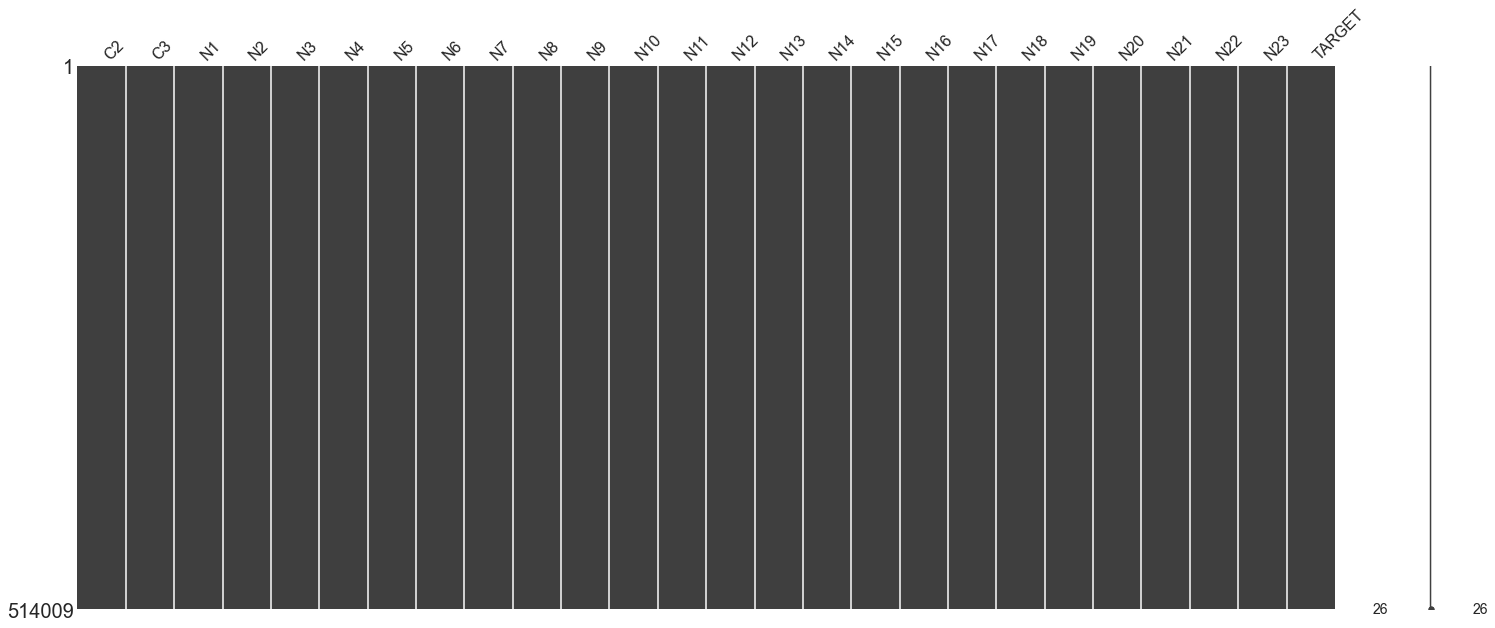

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
# We saw that N1 till N14 cols are writen as an Object,so checking:
df = data.iloc[:, 2:15]
df.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13
0,"83,74","3172,92","181,48","24,83","9,6",0,0,"24,83","9,6","24,83","9,6",0,0
1,"1,46","1273,88","92,11","211,78","28,98","5,75","13,85","206,03","15,13","211,78","28,98",0,0
2,0,"31,95","763,19","48,13","77,22","9,33","4,9","38,8","72,32","48,13","77,22",0,0
3,"117,49","529,19","1506,4","127,67","49,3","6,25","0,2","120,07","49,1","127,67","49,3",0,0
4,0,"38,24","3493,18","389,98","72,78","16,72","4,28","373,27","68,5","389,98","72,78",0,0


In [ ]:
columns = list(data.columns)

#change the first and last column names below as required
start_column = columns.index('N1')
end_column   = columns.index('N13')

for index, col in enumerate(columns):
    if (start_column <= index) & (index <= end_column):
        data[col] = data[col].apply(lambda val: val.replace(',', ''))
        data[col] = pd.to_numeric(data[col])
        
        #data[col] = data[col].astype(float)
data.head()

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,323531,33,8374,317292,18148,2483,96,0,0,2483,...,7,0,0,36,7,36,7,0,0,0
1,343835,31,146,127388,9211,21178,2898,575,1385,20603,...,18,5,6,52,12,57,18,0,0,0
2,323531,33,0,3195,76319,4813,7722,933,49,388,...,24,18,6,46,18,64,24,0,0,0
3,343433,31,11749,52919,15064,12767,493,625,2,12007,...,57,4,1,142,56,148,57,0,0,0
4,343835,31,0,3824,349318,38998,7278,1672,428,37327,...,28,17,5,69,23,86,28,0,0,0


In [ ]:
# checking DATATYPES CHANGED:
data.dtypes

C2        int64
C3        int64
N1        int64
N2        int64
N3        int64
N4        int64
N5        int64
N6        int64
N7        int64
N8        int64
N9        int64
N10       int64
N11       int64
N12       int64
N13       int64
N14       int64
N15       int64
N16       int64
N17       int64
N18       int64
N19       int64
N20       int64
N21       int64
N22       int64
N23       int64
TARGET    int64
dtype: object

# 4. Exploratory Data Analysis

## 1. Pie Chart

In [ ]:
# TERGET VALUES UNIQUE NUMBERS:
data['TARGET'].value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

**Here, WE CAN SEE THAT Zeros-0 - **

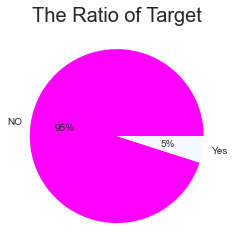

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([ 488665, 25344])
mylabels = ["NO", "Yes"]
color=['fuchsia','ghostwhite']
plt.pie(y, labels = mylabels,colors=color,autopct='%.0f%%')
plt.title('The Ratio of Target', fontsize=20)
plt.show()

## 2. Correlation Matrix Plot

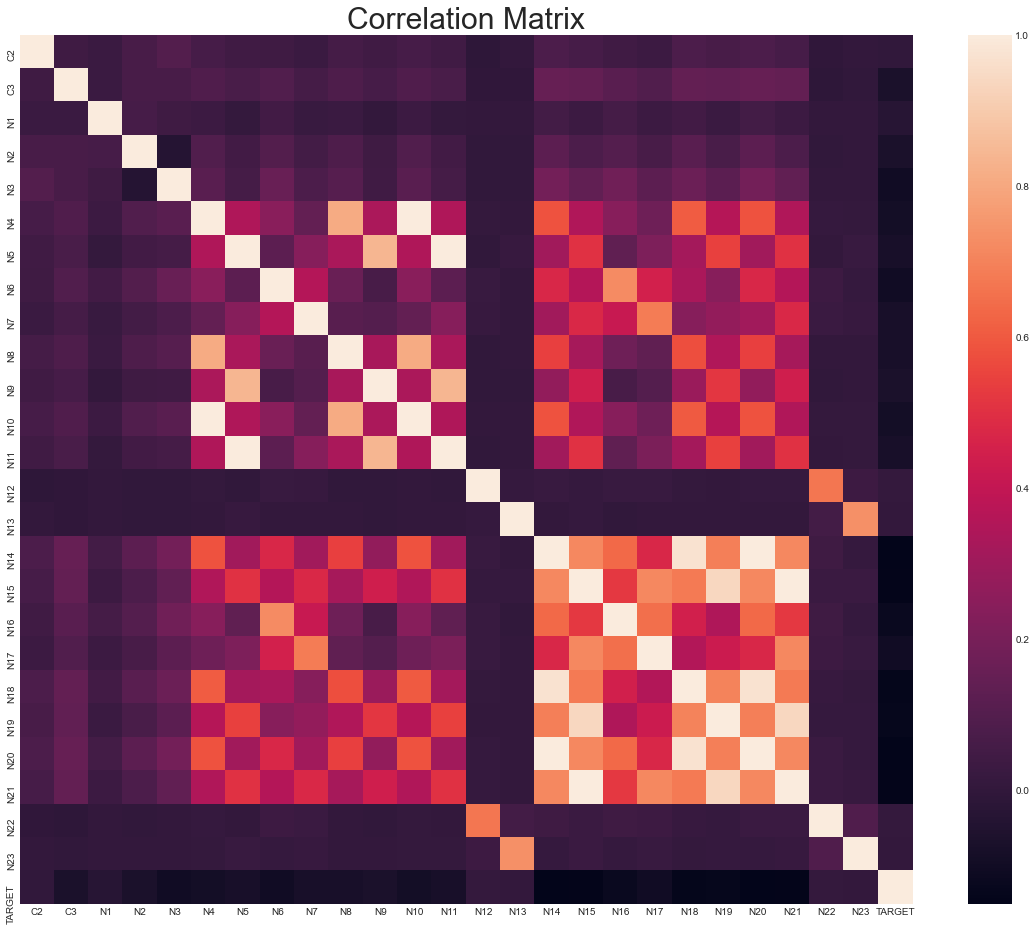

In [ ]:
# PLOTTIG GRAPHS
f, (ax) = plt.subplots(1, 1, figsize=(20,16))
sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, annot_kws={'size':16}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=30)
plt.show()

## 3.Scatter plots for N1,N12,N22, N23:

<AxesSubplot:xlabel='TARGET', ylabel='N23'>

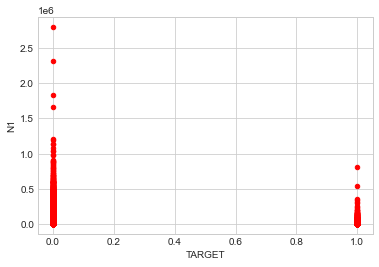

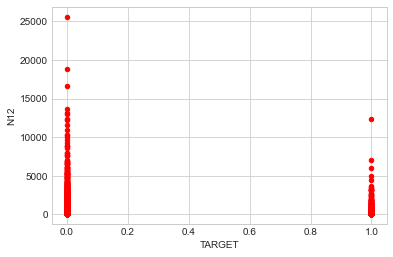

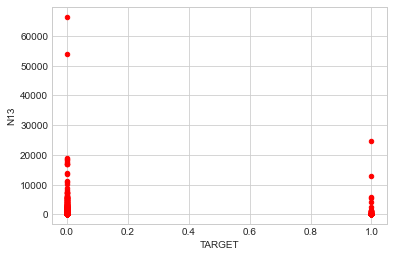

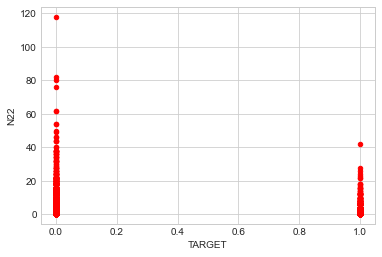

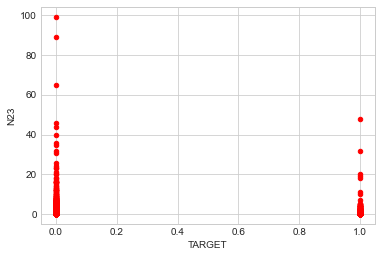

In [ ]:
# PLOTTING SCATTER PLOTS TO SEE RANGES
data.plot.scatter(x='TARGET',y="N1",color='r')
data.plot.scatter(x='TARGET',y="N12",color='r')
data.plot.scatter(x='TARGET',y="N13",color='r')
data.plot.scatter(x='TARGET',y="N22",color='r')
data.plot.scatter(x='TARGET',y="N23",color='r')

In [ ]:
data.groupby('TARGET').count()

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,...,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
TARGET,,,,,,,,,,,,,,,,,,,,,
0,488665,488665,488665,488665,488665,488665,488665,488665,488665,488665,...,488665,488665,488665,488665,488665,488665,488665,488665,488665,488665
1,25344,25344,25344,25344,25344,25344,25344,25344,25344,25344,...,25344,25344,25344,25344,25344,25344,25344,25344,25344,25344


# 5.Creating different Models

## Train and Test Split:

In [ ]:
# X and y arrays:
X = data.drop("TARGET", axis = 1) 
y = data["TARGET"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(359806, 25)
(359806,)
(154203, 25)
(154203,)


## We used MinMaxScaller to normalize our data. 
+ #check this link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
# Scaling data
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating NaiveBayse Model by using GaussianNB
+ http://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
NaiveBayse_model = GaussianNB()
# Fit the model using train sets
NaiveBayse_model.fit(X_train, y_train)
#prdicted values
y_predict_NaiveBayse = NaiveBayse_model.predict(X_test)
#checking accuracy of predicted values
NaiveBayse_train_score = round(NaiveBayse_model.score(X_train,y_train),3)
NaiveBayse_test_score = round(NaiveBayse_model.score(X_test,y_test),3)
NaiveBayse_mse = round(mean_squared_error(y_test, y_predict_NaiveBayse),3)
NaiveBayse_recall =  round(recall_score(y_test, y_predict_NaiveBayse),3)
NaiveBayse_precision = round(precision_score(y_test, y_predict_NaiveBayse),3)
NB_F1_score =  round(f1_score(y_test, y_predict_NaiveBayse),3)

#Printing results
print('Accuracy on Train set', NaiveBayse_train_score)
print('Accuracy on Test set', NaiveBayse_test_score) 
print('MSE on Test set', NaiveBayse_mse) 
print('Recall_score on Test set', NaiveBayse_recall)
print('Precision_score on Test set',NaiveBayse_precision)
print('f1_score on Test set',NB_F1_score)
print('Confusion_matrix on Test set',confusion_matrix(y_test, y_predict_NaiveBayse))

Accuracy on Train set 0.536
Accuracy on Test set 0.535
MSE on Test set 0.465
Recall_score on Test set 0.879
Precision_score on Test set 0.086
f1_score on Test set 0.157
Confusion_matrix on Test set [[75782 70804]
 [  924  6693]]


## Checking Area_under_curve on train and test data:

AUC on test set 0.826


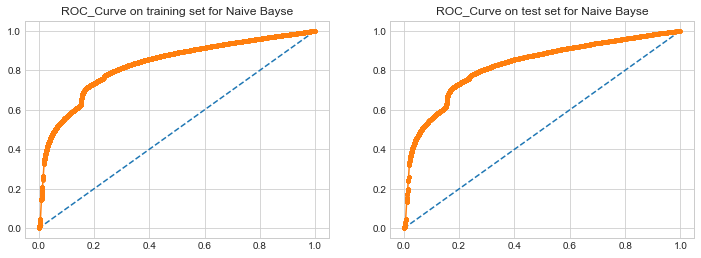

In [ ]:
# probability
NB_probs_train = NaiveBayse_model.predict_proba(X_train)
NB_probs_train = NB_probs_train[:, 1]
NB_probs_test = NaiveBayse_model.predict_proba(X_test)
NB_probs_test = NB_probs_test[:, 1]
# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, NB_probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, NB_probs_test)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for Naive Bayse');
ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for Naive Bayse');
auc_NaiveBayse_test = round(auc(fpr_test, tpr_test),3)
print('AUC on test set',auc_NaiveBayse_test)

### Here, we can see that AUC SCORE is 82, which is Quite good

## Creating RandomForestClassifier Model:

In [ ]:
RF_model = RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500)

RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)

#checking accuracy of predicted values
RF_train_score = round(RF_model.score(X_train,y_train),3)
RF_test_score = round(RF_model.score(X_test,y_test),3)
RF_mse = round(mean_squared_error(y_test, y_pred_RF),3)
RF_recall =  round(recall_score(y_test, y_pred_RF),3)
RF_precision = round(precision_score(y_test, y_pred_RF),3)
RF_F1_score =  round(f1_score(y_test, y_pred_RF),3)
#Printing results
print('Accuracy on Train set', RF_train_score)
print('Accuracy on Test set', RF_test_score)
print('MSE on Test set', RF_mse)
print('Recall_score on Test set', RF_recall)
print('Precision_score on Test set',RF_precision)
print('f1_score on Test set',RF_F1_score)
print('Confusion_matrix on Test set',confusion_matrix(y_test, y_pred_RF))

Accuracy on Train set 0.952
Accuracy on Test set 0.952
MSE on Test set 0.048
Recall_score on Test set 0.088
Precision_score on Test set 0.579
f1_score on Test set 0.152
Confusion_matrix on Test set [[146100    486]
 [  6949    668]]


## Checking Area_under_curve on train and test data:

AUC on test set 0.865


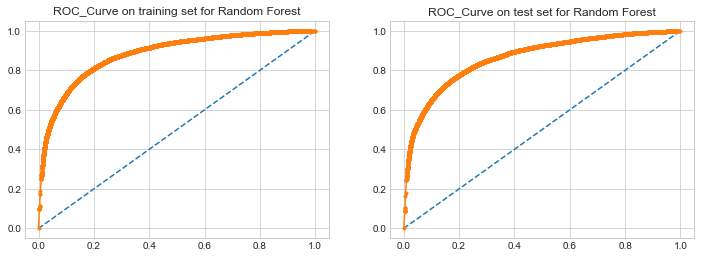

In [ ]:
# probability
probs_train = RF_model.predict_proba(X_train)
probs_train = probs_train[:, 1]
probs_test = RF_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for Random Forest');
ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for Random Forest');
auc_RF_test = round(auc(fpr_test, tpr_test),3)
print('AUC on test set',auc_RF_test)

## Here, auc is 0.86 is very well.

# Let's handle with Imbalanced Dataset, in order to make equal # of 0 and 1:
## By using RandomOverSampler
+ https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [ ]:
# pip install -U imbalanced-learn

In [ ]:
# example of random oversampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# define dataset
# X and y arrays:
X = data.drop("TARGET", axis = 1) # All columns except this column.
y = data["TARGET"] # Only this column
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 488665, 1: 25344})
Counter({0: 488665, 1: 488665})


In [ ]:
print(Counter(X_over))

Counter({'C2': 1, 'C3': 1, 'N1': 1, 'N2': 1, 'N3': 1, 'N4': 1, 'N5': 1, 'N6': 1, 'N7': 1, 'N8': 1, 'N9': 1, 'N10': 1, 'N11': 1, 'N12': 1, 'N13': 1, 'N14': 1, 'N15': 1, 'N16': 1, 'N17': 1, 'N18': 1, 'N19': 1, 'N20': 1, 'N21': 1, 'N22': 1, 'N23': 1})


###  Train-Test Split

In [ ]:
# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3) # 70% training and 30% test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(684131, 25)
(684131,)
(293199, 25)
(293199,)


## As our Dataset is Balanced, creating DecisionTreeClassifier Model:
+ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree_model = DecisionTreeClassifier()

DTree_model.fit(X_train,y_train)
y_pred_dt = DTree_model.predict(X_test)

#checking accuracy of predicted values
DT_train_score = round(DTree_model.score(X_train,y_train),3)
DT_test_score = round(DTree_model.score(X_test,y_test),3)
DT_mse = round(mean_squared_error(y_test, y_pred_dt),3)
DT_recall =  round(recall_score(y_test, y_pred_dt),3)
DT_precision = round(precision_score(y_test, y_pred_dt),3)
DT_F1_score =  round(f1_score(y_test, y_pred_dt),3)

#Printing results
print('Accuracy on Train set', DT_train_score)
print('Accuracy on Test set', DT_test_score)
print('MSE on Test set', DT_mse)
print('Recall_score on Test set', DT_recall)
print('Precision_score on Test set',DT_precision)
print('Confusion_matrix on Test set',confusion_matrix(y_test, y_pred_dt))
print('f1_score on Test set',DT_F1_score)

Accuracy on Train set 0.989
Accuracy on Test set 0.968
MSE on Test set 0.032
Recall_score on Test set 1.0
Precision_score on Test set 0.94
Confusion_matrix on Test set [[137715   9321]
 [     0 146163]]
f1_score on Test set 0.969


### Checking AUC metric:

AUC on test set 0.97


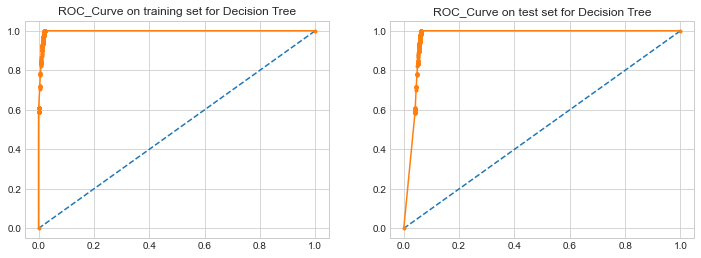

In [ ]:
# probability
probs_train = DTree_model.predict_proba(X_train)
probs_train = probs_train[:, 1]
probs_test = DTree_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
# plot
plt.style.use('seaborn-whitegrid')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot([0, 1], [0, 1], linestyle='--');
ax1.plot(fpr_train, tpr_train, marker='.');
ax1.set_title('ROC_Curve on training set for Decision Tree');
ax2.plot([0, 1], [0, 1], linestyle='--');
ax2.plot(fpr_test, tpr_test, marker='.');
ax2.set_title('ROC_Curve on test set for Decision Tree');
auc_DT_test = round(auc(fpr_test, tpr_test),2)
print('AUC on test set',auc_DT_test)

## AUC is 0.97 which is very suitable score for Model.

In [ ]:
# 4. Combine over- and under-sampling using SMOTE

# from imblearn.over_sampling import SMOTE
# from collections import Counter

# X and y arrays:
# X = data.drop("TARGET", axis = 1) # All columns except this column.
# y = data["TARGET"] # Only this column

# smot = SMOTE()
# X_res, y_res = smot.fit_resample(X, y)
# print(f'Original train dataset shape: {Counter(y)}')
# print(f'Resampled train dataset shape: {Counter(y_res)}\n')
# Result is  0 and 1 are equal

### Guide of Found Metrics :

+ The **Mean square error (MSE)** is the average of the square of the errors. The lower the value the better and 0 means the model is perfect.The larger the number the larger the error.
+ 
+ The **Recall** is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
+
+ The **Precision** is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
+  
+ The **F1 score** is a way of combining the precision and recall of the model. An F1 score reaches its best value at 1 and worst value at 0. A low F1 score is an indication of both poor precision and poor recall.
+ 
+ The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. The AUC value lies between 0.5 to 1 were 0.5 denotes a bad classifier and1 denotes an excellent classifier.
+ 
+ A **Confusion Matrix** is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model
+

## In the end, we just created Dataframe, to see Score our observed models:

In [ ]:
# collecting into 1 Dataframe
all_train_score = [NaiveBayse_train_score,RF_train_score,DT_train_score]
all_test_score = [NaiveBayse_test_score,RF_test_score,DT_test_score]

all_mse = [NaiveBayse_mse,RF_mse, DT_mse ]
all_recall = [NaiveBayse_recall,RF_recall, DT_recall]
all_precision = [NaiveBayse_precision,RF_precision,DT_precision ]

all_F1 = [NB_F1_score,RF_F1_score,DT_F1_score]
all_Auc = [auc_NaiveBayse_test, auc_RF_test, auc_DT_test ]

#columns:
columns={'Train_Score':all_train_score,'Test_Score':all_test_score,'MSE_score':all_mse, 'Recall':all_recall,'Precision':all_precision,'F1_score':all_F1,'AUC_score':all_Auc}

models=['NaiveBayes Classifier', 'RandomForest Classifier', 'Decision Tree Classifier-AN']
result = pd.DataFrame(data = columns,index = models)
result

,Train_Score,Test_Score,MSE_score,Recall,Precision,F1_score,AUC_score
NaiveBayes Classifier,0.536,0.535,0.465,0.879,0.086,0.157,0.826
RandomForest Classifier,0.952,0.952,0.048,0.088,0.579,0.152,0.865
Decision Tree Classifier-AN,0.989,0.968,0.032,1.000,0.940,0.969,0.970


# Conslusion
### Comparison of models
+ To begin, we can see that first 2 models that created on Imbalanced data are NaiveBayes and RandomForest Classiifiers.
+ **NaiveBayes** have shown results scores for ACCURACY is low - 53 %, while MSE is quite good,  because it is close to 0.4. Recall is also close to 1, is best value, while, precision is 0.086, so it is worst. As a result, F-1 score is worst case.However, AUC_score is close to 1, like 0.82 is acceptable classifier.
+ 
+ **RandomForest Classifier** has shown very well results, such as acuracy is high- 95 %, MSE is low, it is fine, Recall is low, while precision is medium, as a consequnce F1-score is very low, bad case. Mean while, AUC is again very high, so it is suitable.
+ 
+ To continue, next model is done by the help of **Oversampling the Data**, eventually we buld the **Decision Tree Classifier Model.**
+ For this model, all result were pleasing, as we can see from both Train and test accuracy scores were extremely high, **98 % and 96 %** .MSE is also, smaller than other models showed. Recall is exactly 1, so best, and Precision is also close to 1, like 0.9, also the best, and if we combine them  to get F1_score is suitable  as 0.9. Finally, our AUC score is  0.97, it means that our model has an **EXCELLENT prediction** 